In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
# Reading the training set
Demographics_reduced = pd.read_csv('Demographics_reduced.csv')
Demographics_reduced.head(5)

print(Demographics_reduced.shape)

(16404, 9)


In [3]:
Demographics_reduced.describe()

,TotalChildren,YearlyIncome
count,16404.000000,16404.000000
mean,2.004511,78129.672397
std,1.682318,39728.383493
min,0.000000,9482.000000
25%,0.000000,47808.750000
50%,2.000000,76125.000000
75%,3.000000,105211.750000
max,5.000000,196511.000000


In [4]:
Demographics_reduced.head(10)

,Education,Occupation,Gender,MaritalStatus,TotalChildren,YearlyIncome,AgeGroup,CarGroup,Children
0,Bachelors,Professional,M,M,2,137947,Group_2,No_car,No_children
1,Bachelors,Professional,M,S,3,101141,Group_2,1-2,With_Children
2,Bachelors,Professional,M,M,3,91945,Group_2,1-2,With_Children
3,Bachelors,Professional,F,S,0,86688,Group_2,1-2,No_children
4,Bachelors,Professional,F,S,5,92771,Group_2,3 or more,With_Children
5,Bachelors,Professional,M,S,0,103199,Group_2,1-2,No_children
6,Bachelors,Professional,F,S,0,84756,Group_2,1-2,No_children
7,Bachelors,Professional,M,M,3,109759,Group_2,1-2,With_Children
8,Bachelors,Professional,F,S,4,88005,Group_2,3 or more,With_Children
9,Bachelors,Professional,M,S,0,106399,Group_2,1-2,No_children


In [5]:
# Reading the Test set
TestSet_reduced = pd.read_csv('TestSet_reduced.csv')
TestSet_reduced.head(5)
print(TestSet_reduced.shape)

(500, 9)


In [6]:
TestSet_reduced.head(10)

,Education,Occupation,Gender,MaritalStatus,TotalChildren,YearlyIncome,AgeGroup,CarGroup,Children
0,Bachelors,Management,F,S,5,86931,Group_3,1-2,No_children
1,Bachelors,Skilled Manual,M,M,4,100125,Group_2,1-2,With_Children
2,Graduate Degree,Management,F,M,4,103985,Group_4,1-2,No_children
3,Graduate Degree,Skilled Manual,M,M,4,127161,Group_2,No_car,No_children
4,High School,Manual,F,M,2,21876,Group_2,1-2,With_Children
5,Partial College,Clerical,F,M,1,44467,Group_2,1-2,No_children
6,Bachelors,Skilled Manual,M,S,4,77702,Group_2,1-2,With_Children
7,Bachelors,Professional,M,M,4,99418,Group_2,3 or more,With_Children
8,Partial High School,Manual,M,S,4,13522,Group_2,1-2,With_Children
9,Bachelors,Skilled Manual,F,M,1,46264,Group_1,1-2,With_Children


In [7]:
AveMonthSpend_reduced = pd.read_csv('AveMonthSpend_reduced.csv')
AveMonthSpend_reduced.head(10)

,AveMonthSpend
0,89
1,117
2,123
3,50
4,95
5,78
6,54
7,130
8,85
9,74


In [8]:
# Sanity check
AveMonthSpend_reduced.describe()
(AveMonthSpend_reduced.astype(np.object) == 'nan').any() # ?,NaN, etc
print(AveMonthSpend_reduced)

       AveMonthSpend
0                 89
1                117
2                123
3                 50
4                 95
...              ...
16399            101
16400             46
16401             79
16402             65
16403             68

[16404 rows x 1 columns]


## Prepare data for scikit-learn model

Creating the labels for scikitlear

In [9]:
labels = AveMonthSpend_reduced.values
np.where(np.isnan(labels) == True)

(array([], dtype=int64), array([], dtype=int64))

In [10]:
# Define which are the categorical variables
cat_cols = [x  for x in Demographics_reduced.columns if pd.api.types.is_string_dtype(Demographics_reduced[x])]
print(cat_cols)

# Define which are the Numerical variables
numeric_cols = [x  for x in Demographics_reduced.columns if pd.api.types.is_numeric_dtype(Demographics_reduced[x])]
print(numeric_cols)

['Education', 'Occupation', 'Gender', 'MaritalStatus', 'AgeGroup', 'CarGroup', 'Children']
['TotalChildren', 'YearlyIncome']


create the numpy feature array or model matrix. As first step, the categorical variables need to be recoded as binary dummy variables. As discussed in another lesson this is a three step process:

Encode the categorical string variables as integers.
Transform the integer coded variables to dummy variables.
Append each dummy coded categorical variable to the model matrix.

In [11]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

def categorical_features(df, cat_cols):
    """
    Returns a numpy array with the categorical variables encoded
    df data frame
    cat_cols categorical columns
    """
    # Creating the first Feature

    Features = encode_string(df[cat_cols[0]])

    for col in cat_cols[1::]:
        temp = encode_string((df[col]))
        print('***********************************\n')
        print("%s has %s dummy variables"%(col,len(df[col].unique())))
        print("These are the dummy variables %s"%(df[col].unique()))
        Features = np.concatenate([Features, temp], axis = 1)
    
    return Features


# For the training
Features = categorical_features(Demographics_reduced,cat_cols)

print(Features.shape)
print(Features[:2, :])   


# For the test

Features_test = categorical_features(TestSet_reduced,cat_cols)
print(Features_test.shape)
print(Features_test[:2, :])  


***********************************

Occupation has 5 dummy variables
These are the dummy variables ['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
***********************************

Gender has 2 dummy variables
These are the dummy variables ['M' 'F']
***********************************

MaritalStatus has 2 dummy variables
These are the dummy variables ['M' 'S']
***********************************

AgeGroup has 4 dummy variables
These are the dummy variables ['Group_2' 'Group_1' 'Group_3' 'Group_4']
***********************************

CarGroup has 3 dummy variables
These are the dummy variables ['No_car' '1-2' '3 or more']
***********************************

Children has 2 dummy variables
These are the dummy variables ['No_children' 'With_Children']
(16404, 23)
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]]
***********************************

Occupation has 5 dummy 

/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/simon/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

Next the numeric features must be concatenated to the numpy array 

In [12]:
# For the Training 

Features = np.concatenate([Features, np.array(Demographics_reduced[numeric_cols])], axis = 1)
print(Features.shape)
print(Features[:2, :])  

# For the test 

Features_test = np.concatenate([Features_test, np.array(TestSet_reduced[numeric_cols])], axis = 1)
print(Features_test.shape)
print(Features_test[:2, :])  


(16404, 25)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 2.00000e+00
  1.37947e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 3.00000e+00
  1.01141e+05]]
(500, 25)
[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 5.00000e+00
  8.69310e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.0000

### Create Test and Sample cases

In [13]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 500)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [14]:
# Checking that the test has the same shape
print(np.shape(X_train))
print(np.shape(Features_test))

(15904, 25)
(500, 25)


### Scaling 

In [15]:
n_numerical = len(numeric_cols)
scaler = preprocessing.StandardScaler().fit(X_train[:,-n_numerical:])
X_train[:,-n_numerical:] = scaler.transform(X_train[:,-n_numerical:])
X_test[:,-n_numerical:] = scaler.transform(X_test[:,-n_numerical:])
X_train[:2,]

# Scaling the test

Features_test[:,-n_numerical:] = scaler.transform(Features_test[:,-n_numerical:])

## Construct the linear regression model

In [16]:
# Sanity check, here I made a mistake before
np.where(np.isnan(y_train)== True)

(array([], dtype=int64),)

In [18]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

Now, print and examine the model coefficients

In [19]:
print(lin_mod.intercept_)
print(lin_mod.coef_)
print(np.shape(lin_mod.coef_))

0.0
[-7.27003497e+12 -7.27003497e+12 -7.27003497e+12 -7.27003497e+12
 -7.27003497e+12  5.35060292e+13  5.35060292e+13  5.35060292e+13
  5.35060292e+13  5.35060292e+13 -4.39390039e+13 -4.39390039e+13
  6.19177354e+13  6.19177354e+13  6.54875271e+12  6.54875271e+12
  6.54875271e+12  6.54875271e+12 -1.46792758e+13 -1.46792758e+13
 -1.46792758e+13 -5.60842027e+13 -5.60842027e+13  6.85914029e+00
  1.01324352e+01]
(25,)


Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). 

In [ ]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])


probabilities_test = logistic_mod.predict_proba(Features_test)

## Score and evaluate the classification model

In [26]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 28)    

# For the test

y_assesment = lin_mod.predict(Features_test)

Mean Square Error      = 92.98401093363762
Root Mean Square Error = 9.6428217308855
Mean Absolute Error    = 7.0239013671875
Median Absolute Error  = 5.2685546875
R^2                    = 0.8763491261246563
Adjusted R^2           = 0.869275876983482


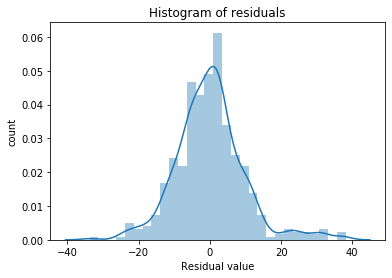

In [22]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)  

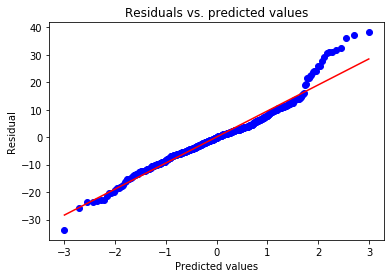

In [23]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)  

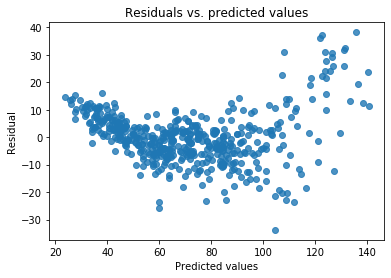

In [24]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

# Exporting the results for the test


In [27]:
np.savetxt("y_assesment.csv",y_assesment, delimiter=',', fmt='%4.2f')

# To improve

There is class imbalance, try undersampling